In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
def load_datasets(filename, data_columns, target_column):
    df = pd.read_csv(filename)
    X, y = df[data_columns], df[target_column]
    return X, y

In [3]:
def plot_data(A, b, test = False):
    positive_indices = np.where(b == 1)[0]
    negative_indices = np.where(b == 0)[0]
    
    plt.scatter(A.iloc[positive_indices, 0], A.iloc[positive_indices, 1], marker='x', c= 'yellow' if test else 'green')
    plt.scatter(A.iloc[negative_indices, 0], A.iloc[negative_indices, 1], marker='+', c= 'blue' if test else 'red')
    
   # plt.show()

In [4]:
def decision_boundary(x1, x2, y, mean, std, theta):
    x_values = [np.min(x1), np.max(x2)]
    y_values = - (theta[0] + np.multiply(theta[1], x_values)) / theta[2]

    plt.plot(x_values, y_values, label='Decision Boundary')
    plt.xlabel('1st Exam results')
    plt.ylabel('2nd Exam results')
    plt.legend()
    plt.show()

In [5]:
def decision_boundary_test(est, x_1, x_2, ax=None, threshold=0.5, contourf=False):
    xx1, xx2 = np.meshgrid(np.linspace(x_1.min(), x_1.max(), 100), 
                           np.linspace(x_2.min(), x_2.max(), 100))

    X_pred = np.c_[xx1.ravel(), xx2.ravel(), np.square(xx1.ravel()), np.square(xx2.ravel()), np.multiply(xx1.ravel(), xx2.ravel())]
    pred = est.predict_proba(X_pred)[:, 1]
    Z = pred.reshape((100, 100))
    if ax is None:
        ax = plt.gca()
    ax.contour(xx1, xx2, Z, levels=[threshold], colors='black')
    ax.set_xlim((x_1.min(), x_1.max()))
    ax.set_ylim((x_2.min(), x_2.max()))

In [6]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)    
    X_new = np.divide((X - mean), std)
    return X_new, mean, std

In [7]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.column_stack((ones, X))
    return X_new

In [8]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [9]:
def h(X, theta):
    z = np.dot(X, theta)
    return sigmoid(z)

In [10]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    _h = h(X, theta)
    J = (1/m) * np.sum(np.dot(-y, np.log(_h)) - np.dot(1-y, np.log(1-_h)))
    return J

In [11]:
def derivative_theta(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    X_t = np.transpose(X)
    hyp = h(X, theta)
    y = np.dot(y, 1)
    d_theta = (1/m) * np.sum( np.dot(X_t, hyp - y) )
    
    return d_theta

In [12]:
def gradient_descent(X, y, theta, alpha, epsilon, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    
    J = cost_function(X, y, theta)
    
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        
        theta = theta - alpha * derivative_theta(X, y, theta)
        
        J = cost_function(X, y, theta)
        
        J_history.append(J)
        
        if i % 1000 == 0 and print_J == True:
            print(J)
        
        if abs(J-J_history[-2]) < epsilon:
            break
            
    return theta, J_history

In [13]:
def prepare_test_dataset(X):
    X['test1test1'] = np.square(X['test1'])
    X['test2test2'] = np.square(X['test2'])
    X['test1test2'] = np.multiply(X['test1'], X['test2'])    
    return X

In [14]:
def predict(X, mean, std, theta):
    mean = np.array(mean)
    std = np.array(std)
    mean.reshape((X.shape[0], 1))
    std.reshape((X.shape[0], 1))
    
    X_new = (X - mean) / std
    X_new = prepare_X(X_new)
    
    predictions = np.sum(h(X_new, theta))
    return predictions

# Dataset 'sats.csv'

In [15]:
data_columns = ["exam1", "exam2"]
target_column = "submitted"
X, y = load_datasets('sats.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(100, 2), y=(100,)


In [16]:
clf = LogisticRegression()
clf = clf.fit(X, y)

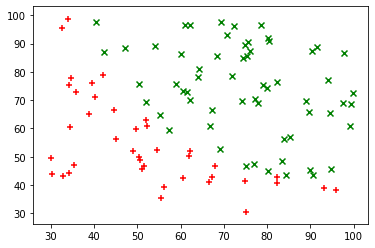

In [17]:
plot_data(X, y)

In [18]:
y_pred = clf.predict(X)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [19]:
accuracy_score(y, y_pred)

0.89

In [20]:
X_new, mean, std = normalize(X)
print(std)

exam1    19.360687
exam2    18.489636
dtype: float64


In [21]:
X_new = prepare_X(X_new)
y_new = np.reshape(y, X_new.shape[0])

In [22]:
theta = np.zeros((X_new.shape[1], 1))

In [23]:
cost_function(X_new, y_new, theta)

0.6931471805599453

In [24]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 1000, False)

In [25]:
cost_function(X_new, y_new, new_theta)

0.6134589357296472

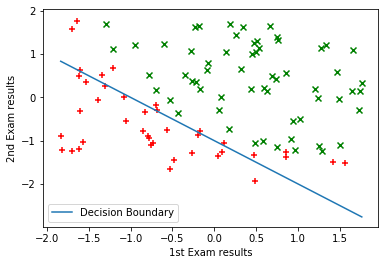

In [26]:
X_norm, m, s = normalize(X)
plot_data(X_norm, y_new)
decision_boundary(X_norm["exam1"], X_norm["exam2"], y_new, mean, std, new_theta)

In [27]:
T = np.array([[40, 40], [60, 65]])
print(predict(T, mean, std, new_theta))

0.962597616340299


# Dataset 'tests.csv'

In [28]:
data_columns = ["test1", "test2"]
target_column = "passed"
X, y = load_datasets('tests.csv', data_columns, target_column)
print('Training set: X={}, y={}'.format(X.shape, y.shape))

Training set: X=(118, 2), y=(118,)


In [29]:
X = prepare_test_dataset(X)
X.head(10)

,test1,test2,test1test1,test2test2,test1test2
0,-0.092742,0.684940,0.008601,0.469143,-0.063523
1,0.051267,0.699560,0.002628,0.489384,0.035864
2,-0.213710,0.692250,0.045672,0.479210,-0.147941
3,-0.375000,0.502190,0.140625,0.252195,-0.188321
4,-0.513250,0.465640,0.263426,0.216821,-0.238990
5,-0.524770,0.209800,0.275384,0.044016,-0.110097
6,-0.398040,0.034357,0.158436,0.001180,-0.013675
7,-0.305880,-0.192250,0.093563,0.036960,0.058805
8,0.016705,-0.404240,0.000279,0.163410,-0.006753
9,0.131910,-0.513890,0.017400,0.264083,-0.067787


In [30]:
clf = LogisticRegression()
clf = clf.fit(X, y)

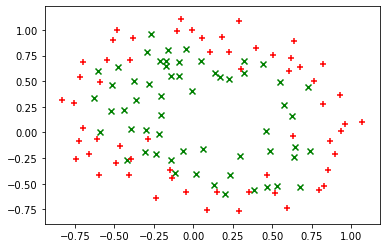

In [31]:
plot_data(X, y)

In [32]:
y_pred = clf.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
accuracy_score(y, y_pred)

0.8135593220338984

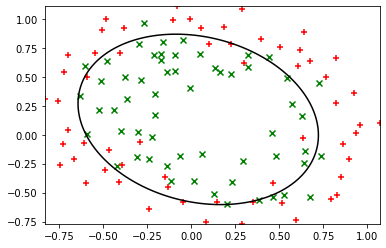

In [34]:
plot_data(X, y)
decision_boundary_test(clf, X.iloc[:, 0], X.iloc[:, 1])

In [35]:
X_new, mean, std = normalize(X)
print(std)

test1         0.494545
test2         0.517536
test1test1    0.247477
test2test2    0.283328
test1test2    0.223123
dtype: float64


In [36]:
X_new = prepare_X(X_new)
y_new = np.reshape(y, X_new.shape[0])

In [37]:
theta = np.zeros((X_new.shape[1], 1))

In [38]:
cost_function(X_new, y_new, theta)

0.6931471805599454

In [39]:
new_theta, Js = gradient_descent(X_new, y_new, theta, 0.01, 1e-7, 1000, False)

In [40]:
cost_function(X_new, y_new, new_theta)

0.8226052810424074

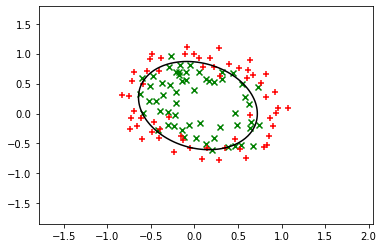

In [41]:
X_norm, m, s = normalize(X)
plot_data(X, y_new)
decision_boundary_test(clf, X_norm.iloc[:, 0], X_norm.iloc[:, 1])